**School**: Slovak University of technology in Bratislava\
**Faculty**: Faculty of Informatics and Information Technologies\
**Course**: NSIETE

**Authors**: Martin Schön and Adam Žák

*Seminar*: Wednesday 16:00\
*Seminar teacher*: Mgr. Lukáš Hudec\
*Academic year*: 2022/2023

**Dataset**: League of Legends diamond ranked games (10 mins)\
Link: https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min

**Dataset description**:\
This dataset contains the first 10min. stats of approx. 10k ranked games from a high ELO (DIAMOND I to MASTER). Players have roughly the same level.

Each game is unique. The gameId can help you to fetch more attributes from the Riot API.

There are 19 features per team (38 in total) collected after 10min in-game. This includes kills, deaths, gold, experience, level…\
The last column in data is information about victory of a blue team.

The column blueWins is the target value (the value we are trying to predict). A value of 1 means the blue team has won. 0 otherwise.

**Notebook description**:\
This notebook serves for Exploratory data analysis of data from dataset. It plots several graphs, looks deeper into data and their correlation and helps user to understand the variables included in the dataset.

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression

In [2]:
pd.set_option('display.max_columns', 500)
DATA_PATH = '../data/high_diamond_ranked_10min.csv'
SAVE_TO = '../data/processed_high_diamond.csv'

data = pd.read_csv(DATA_PATH)

In [3]:
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
data.dtypes

gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills                          int64


In [5]:
data.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [6]:
data.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [7]:
print(data.shape)

(9879, 40)


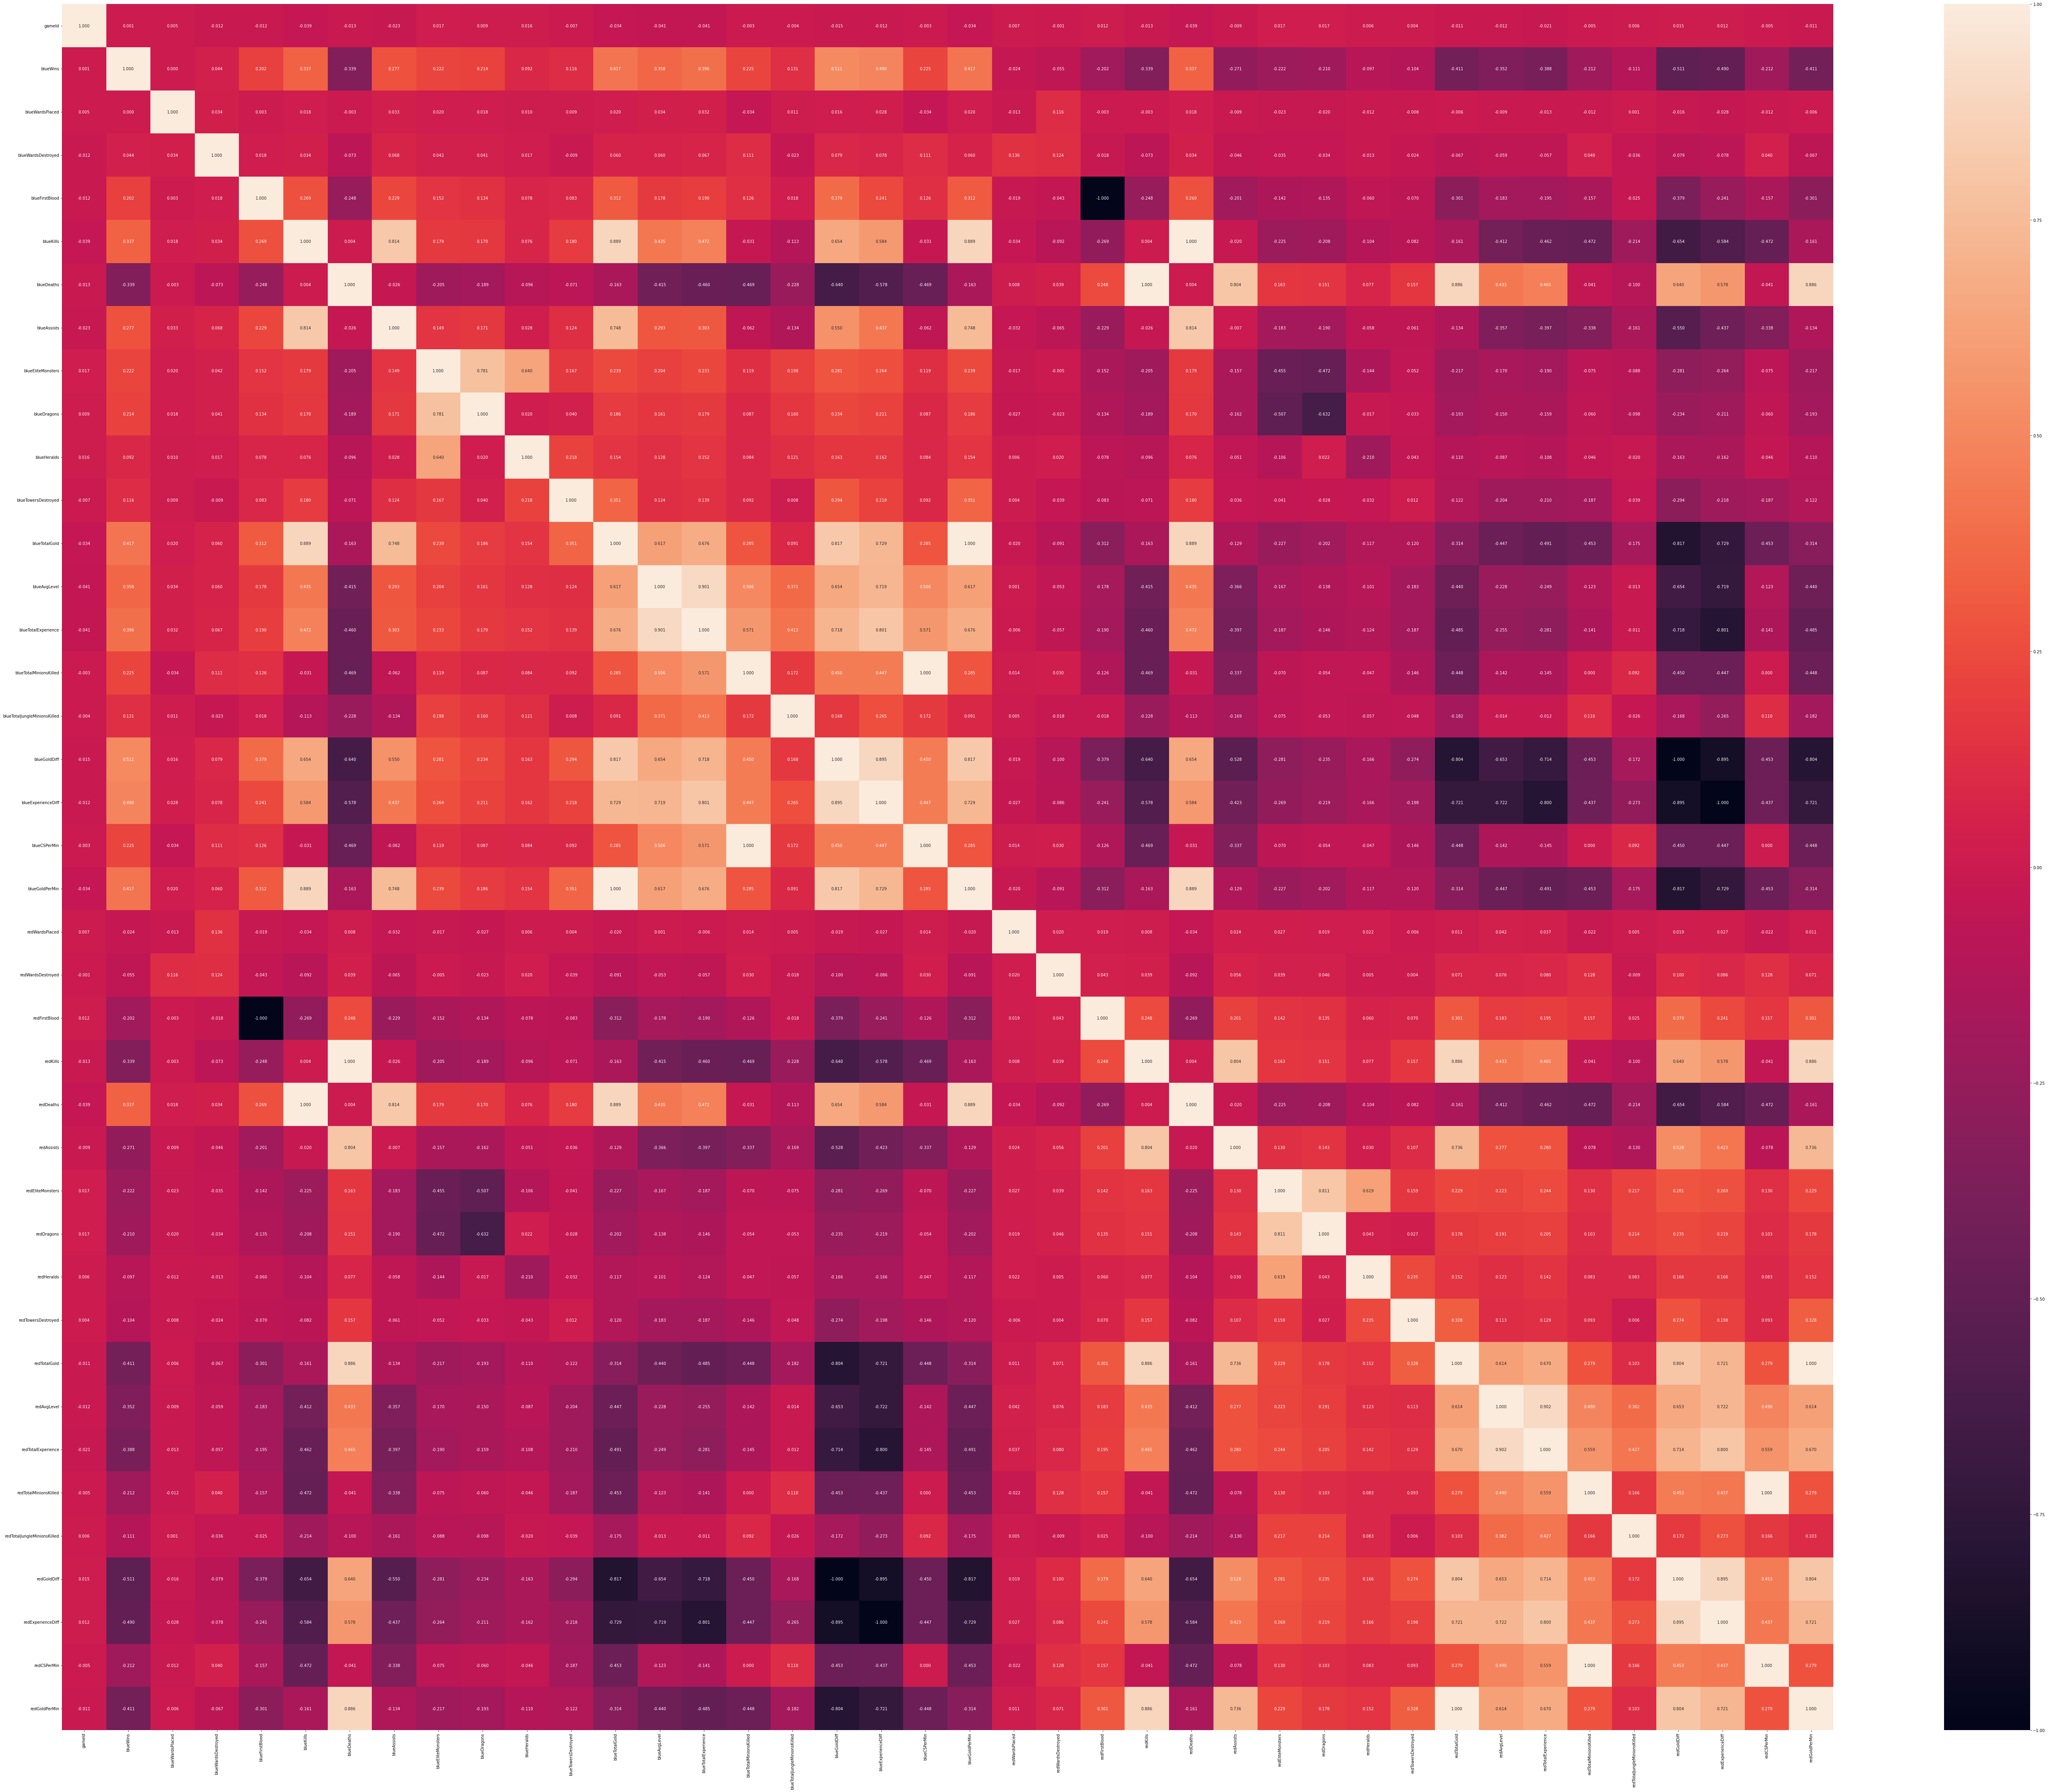

In [8]:
fig, ax = plt.subplots(figsize=(100,80))
sns.heatmap(data.corr(), ax=ax, annot=True, fmt=".3f")
plt.show()

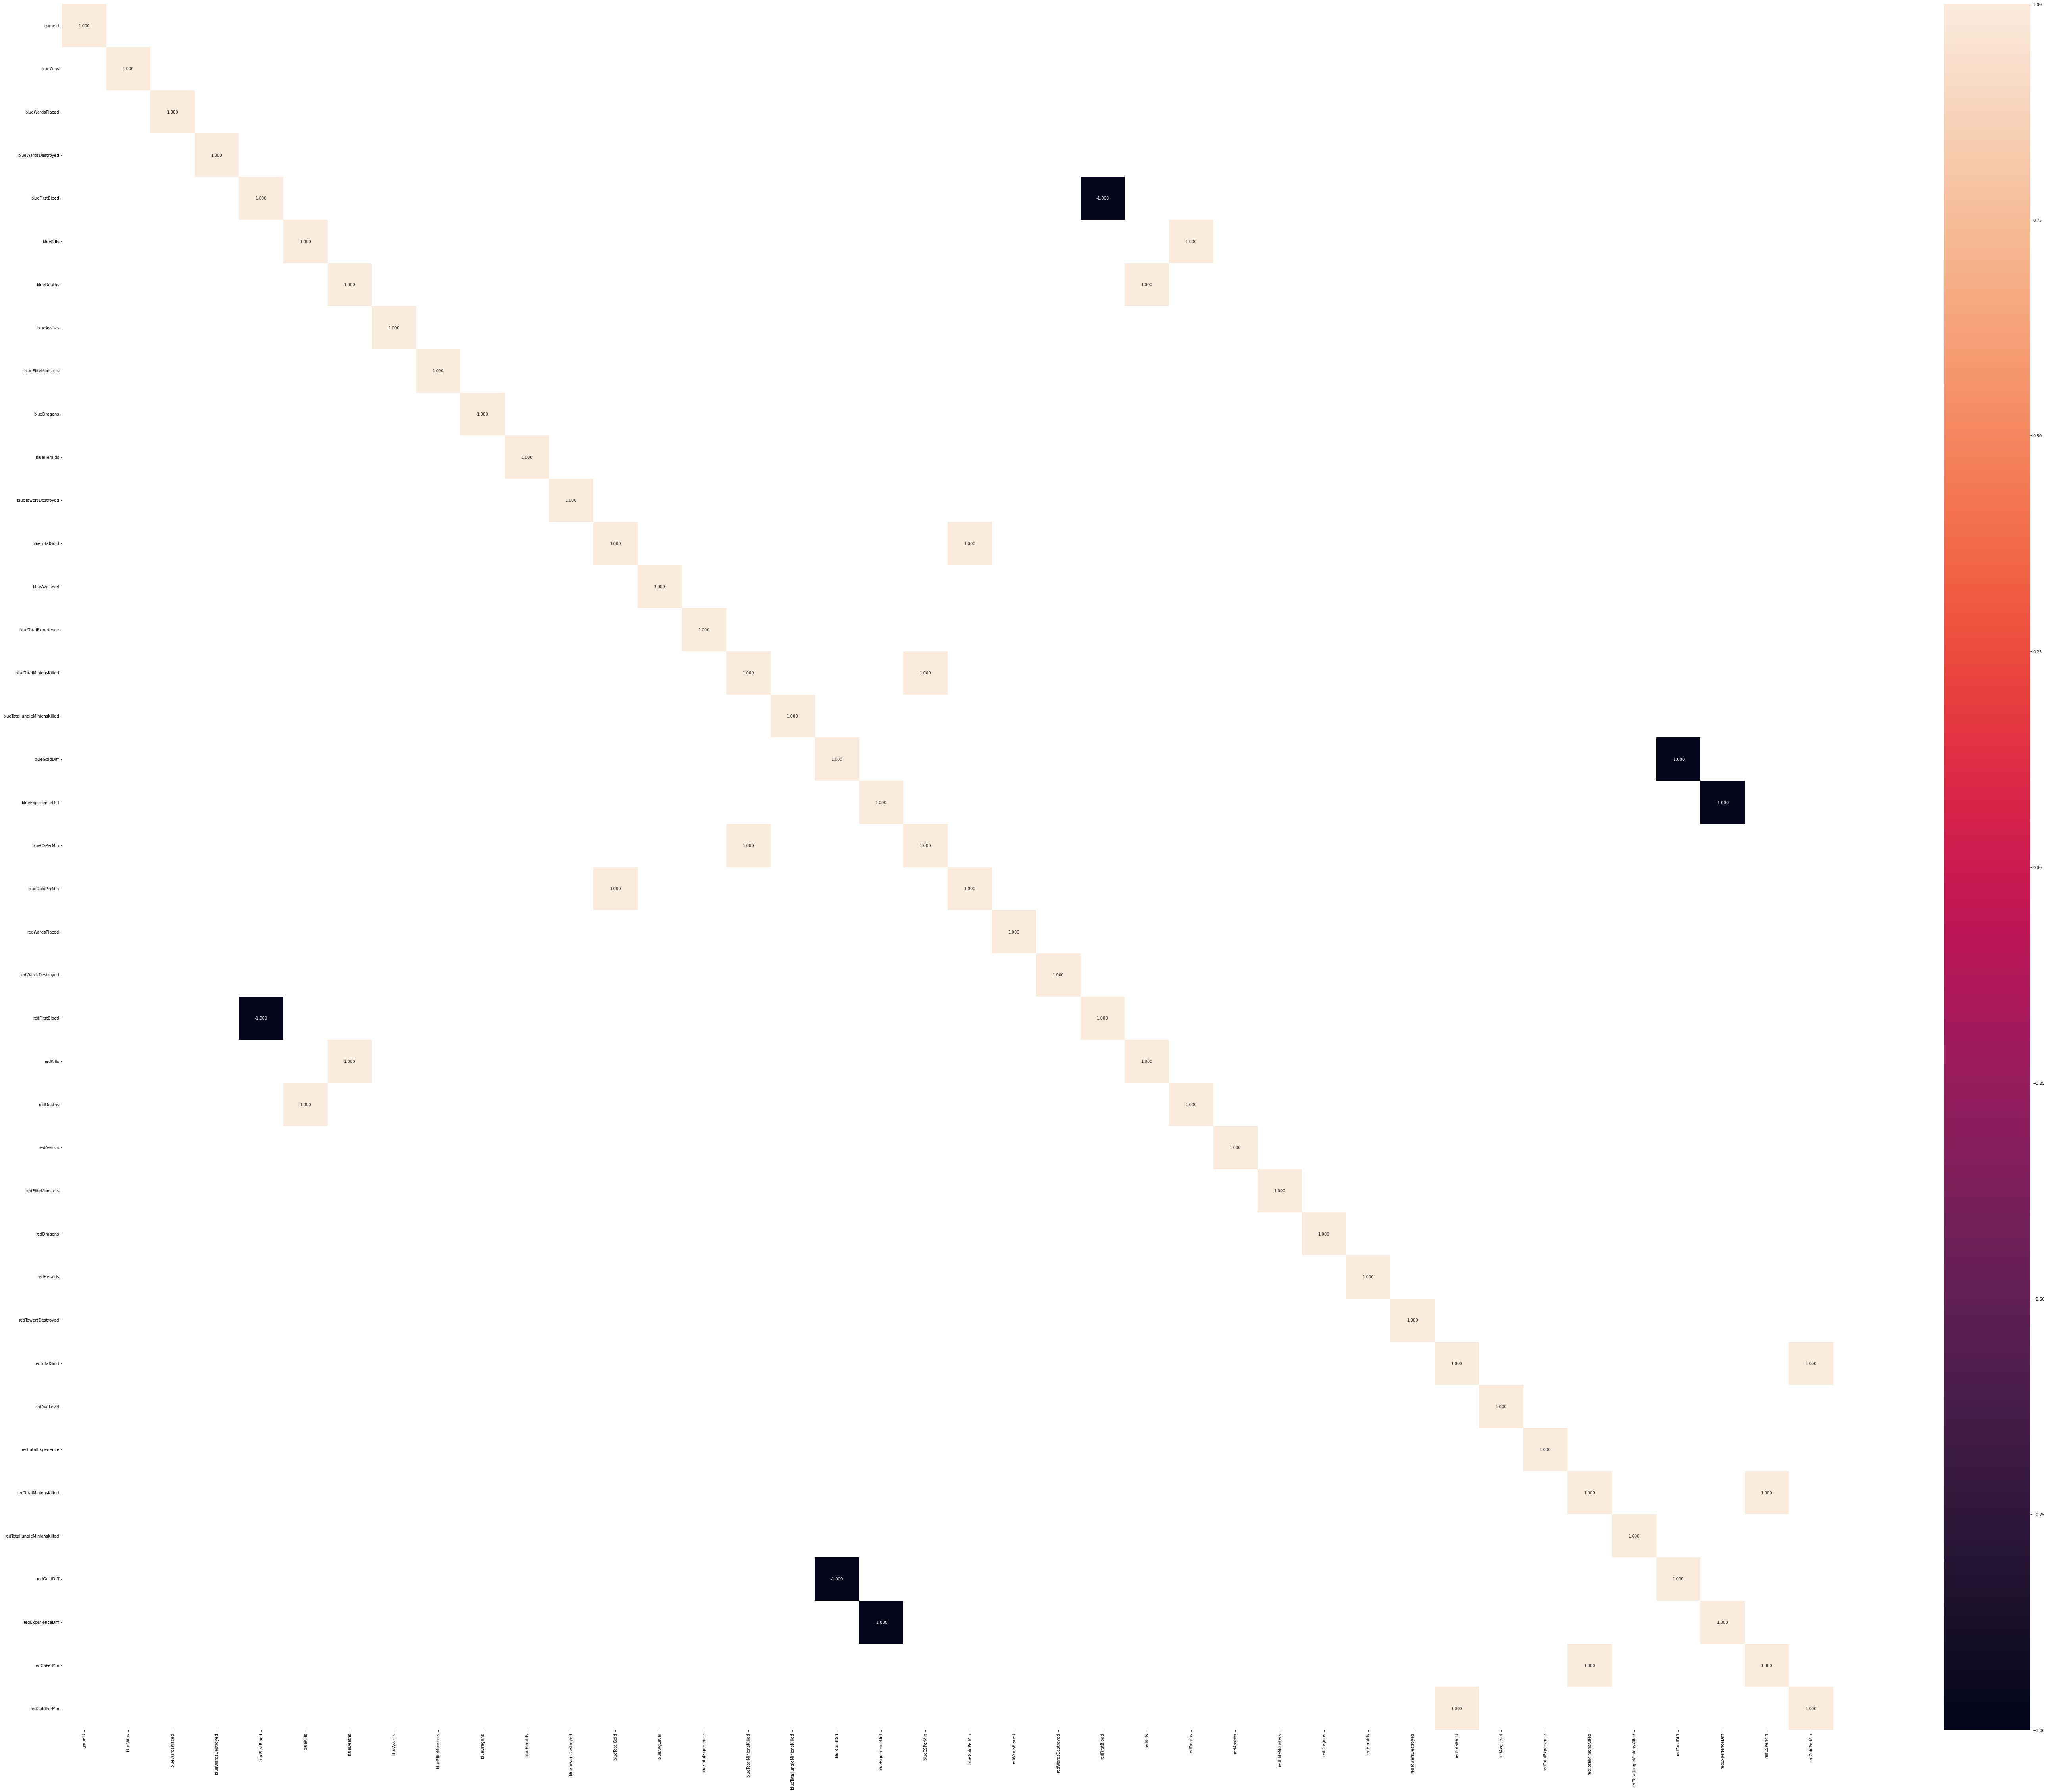

In [9]:
fig, ax = plt.subplots(figsize=(100,80))
crrs = data.corr()
sns.heatmap(crrs[abs(crrs) > 0.95], ax=ax, annot=True, fmt=".3f")
plt.show()

## Dropping columns
At first, we want to delete columns, that are not necessary. There are some columns having the same data just written in different ways - those will have correlation of 1.0 or -1.0 shown on the heatmap above.

In [10]:
data[['redCSPerMin', 'redTotalMinionsKilled', 'blueCSPerMin', 'blueTotalMinionsKilled']].head(5)

,redCSPerMin,redTotalMinionsKilled,blueCSPerMin,blueTotalMinionsKilled
0,19.7,197,19.5,195
1,24.0,240,17.4,174
2,20.3,203,18.6,186
3,23.5,235,20.1,201
4,22.5,225,21.0,210


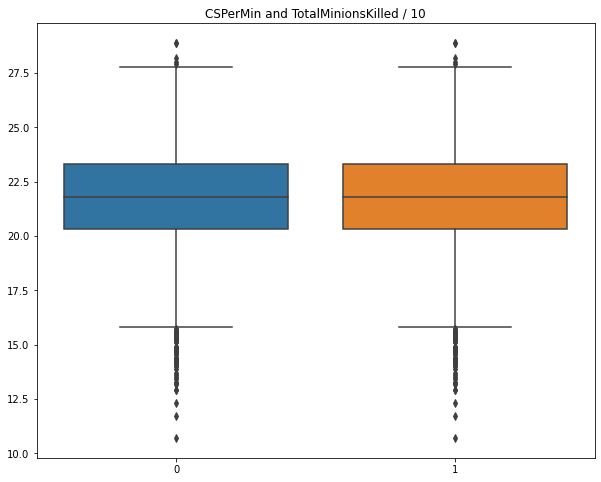

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=[data['redCSPerMin'], data['redTotalMinionsKilled'] / 10])
plt.title("CSPerMin and TotalMinionsKilled / 10")
plt.show()

redCSPerMin and blueCSPerMin (CS == creep score) are basically the columns of TotalMinionsKilled / 10 (for 10 in game minues), so those columns are not brining any new data to the dataset.

In [12]:
data.drop(columns={'redCSPerMin', 'blueCSPerMin'}, inplace=True)

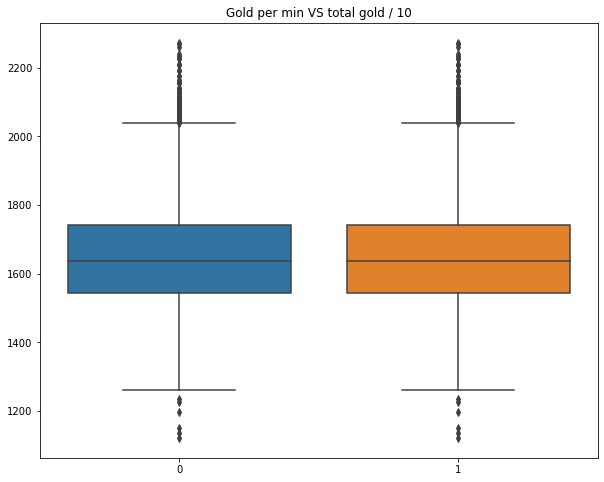

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=[data['redTotalGold'] / 10, data['redGoldPerMin']])
plt.title("Gold per min VS total gold / 10")
plt.show()

The same is true for gold values.

In [14]:
data.drop(columns={'redGoldPerMin', 'blueGoldPerMin'}, inplace=True)

### Data from one team reflected on the other team.
The target variable is "blue wins" which marks victory or loss of blue team.\
There are several columns that are reflecting the same value, but from two different viewpoints (for blue and red team differently) - we will keep blue team ones.\
For example blueKills are mapping redDeaths, so we can only keep blueKills column.

In [15]:
data[data['redKills'] != data['blueDeaths']]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff


In [16]:
data[data['blueKills'] != data['redDeaths']]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff


In [17]:
data[['blueFirstBlood', 'redFirstBlood']].value_counts()

blueFirstBlood  redFirstBlood
1               0                4987
0               1                4892
dtype: int64

In [18]:
data[abs(data['blueGoldDiff']) != abs(data['redGoldDiff'])]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff


In [19]:
data[abs(data['blueExperienceDiff']) != abs(data['redExperienceDiff'])]

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff


In [20]:
data.drop(columns={'redKills', 'redDeaths', 'redFirstBlood', 'redGoldDiff', 'redExperienceDiff'}, inplace=True)

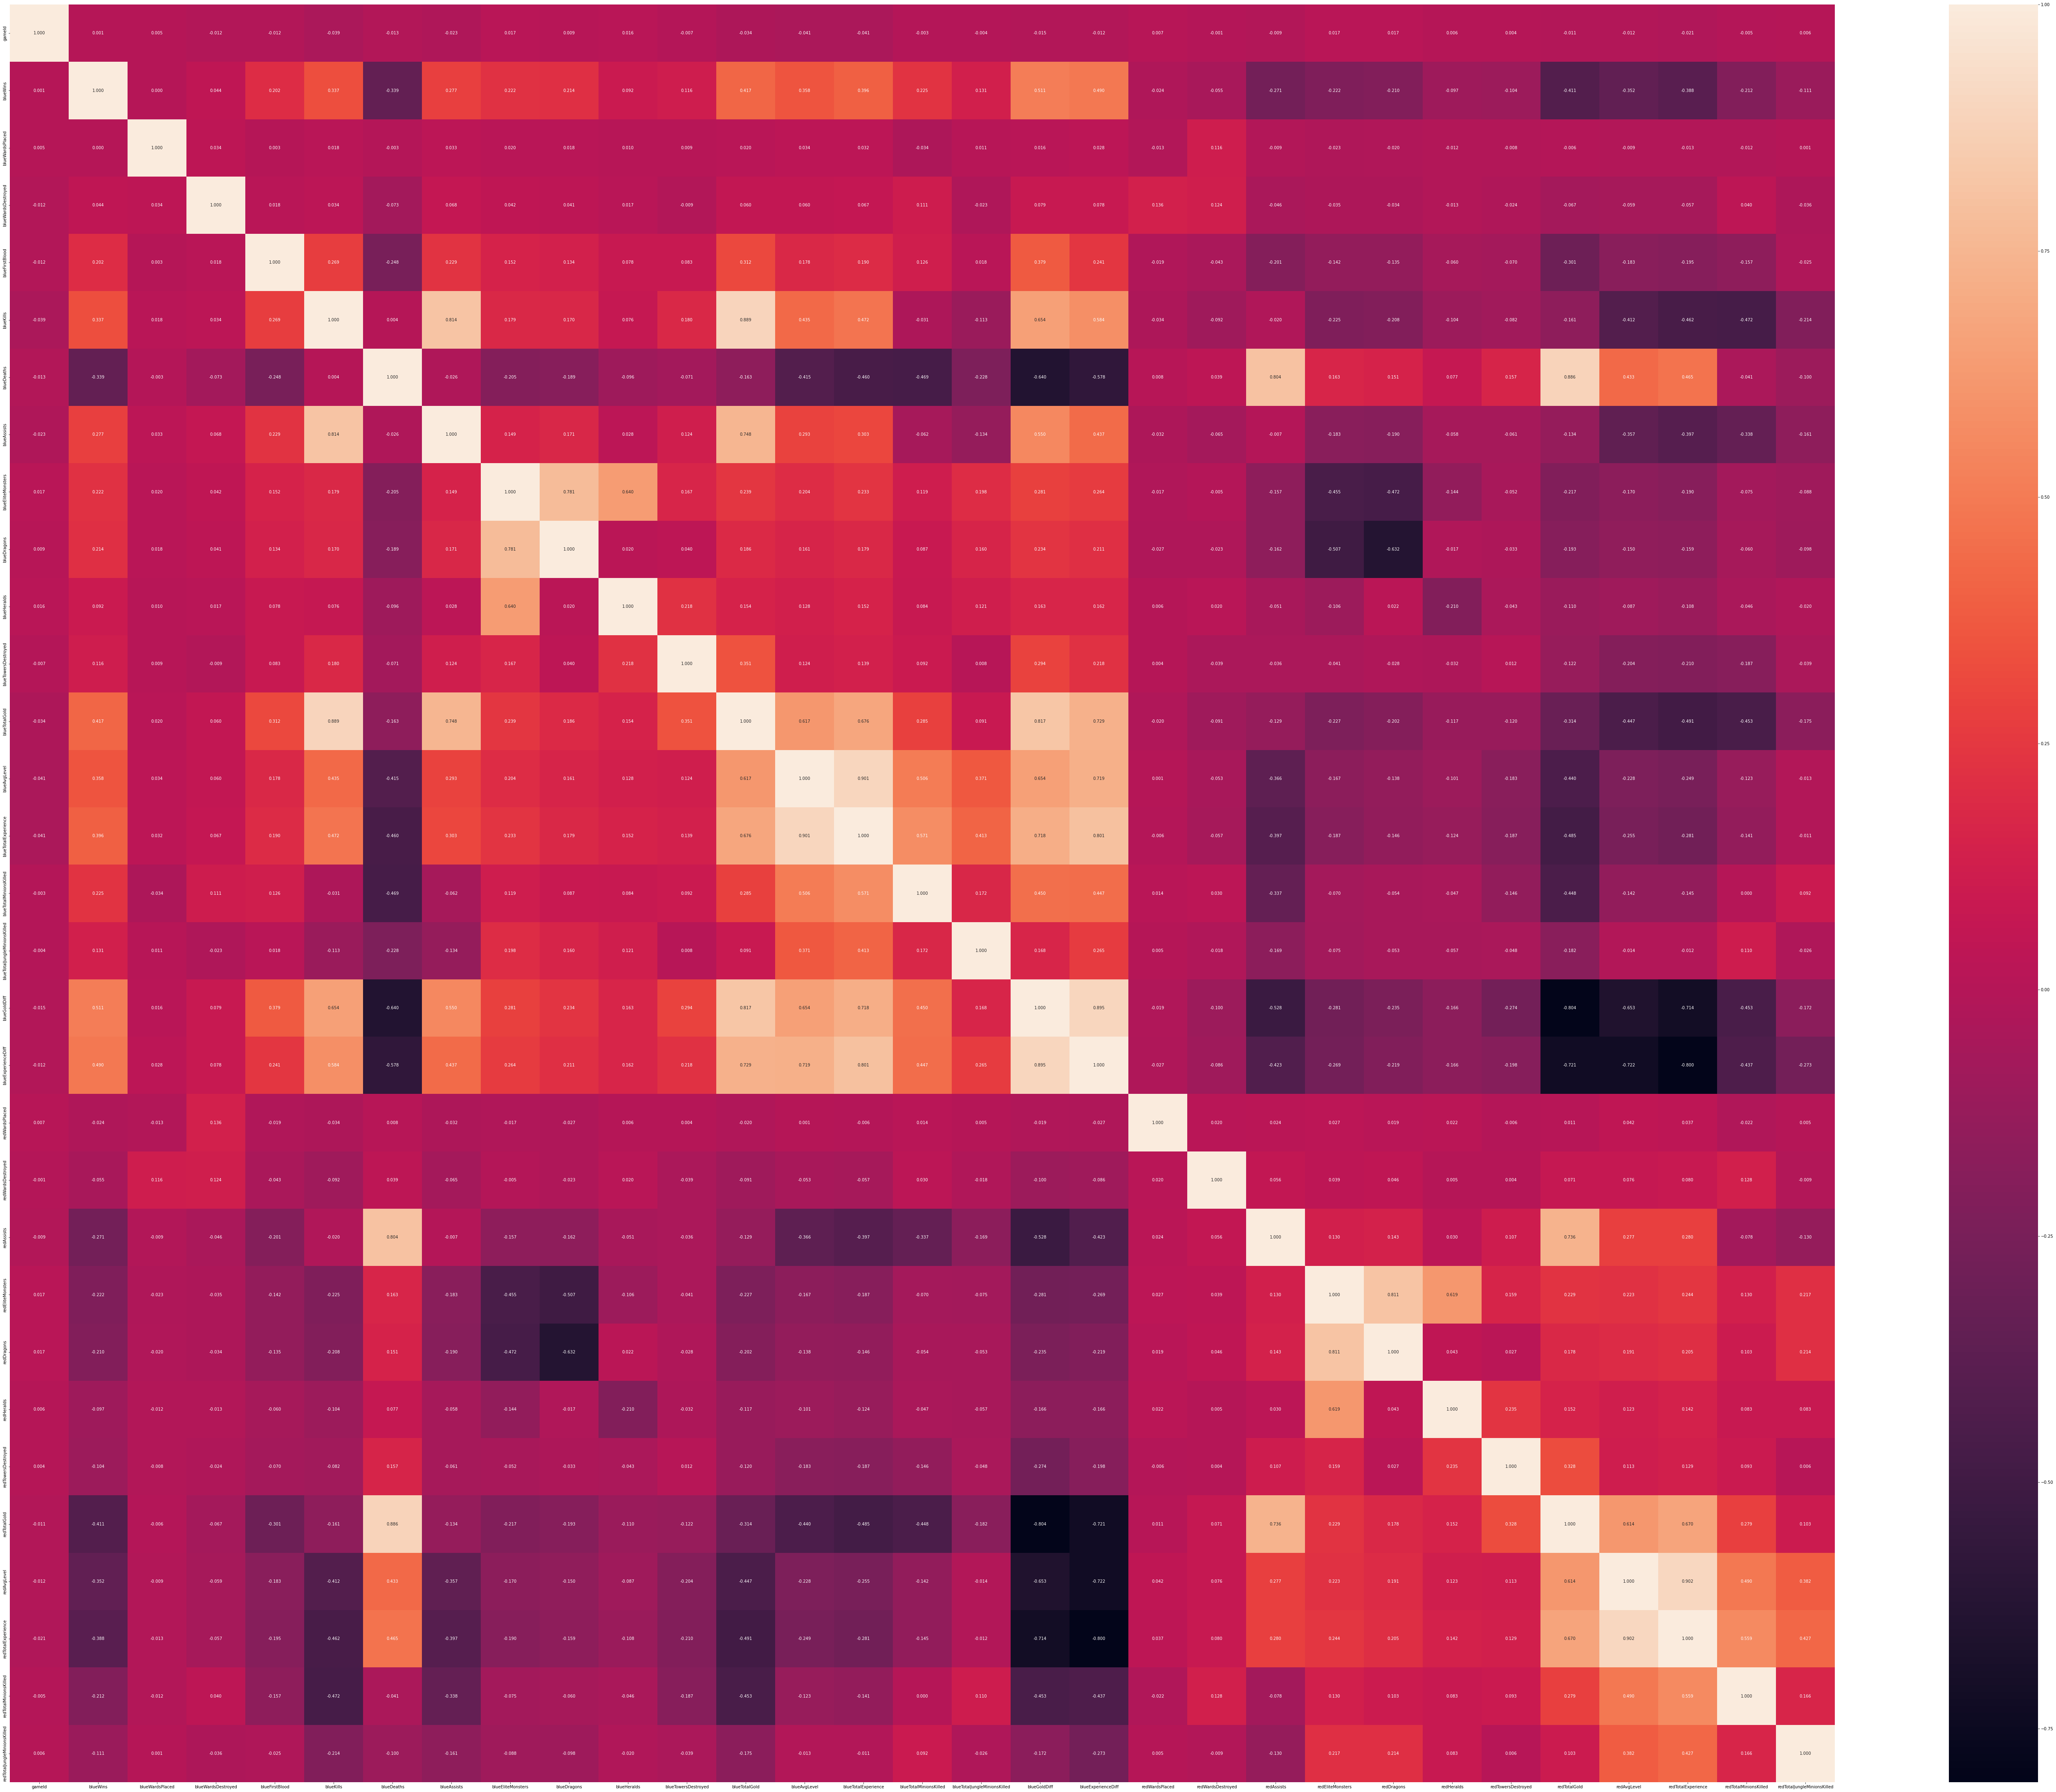

In [21]:
fig, ax = plt.subplots(figsize=(100,80))
sns.heatmap(data.corr(), ax=ax, annot=True, fmt=".3f")
plt.show()

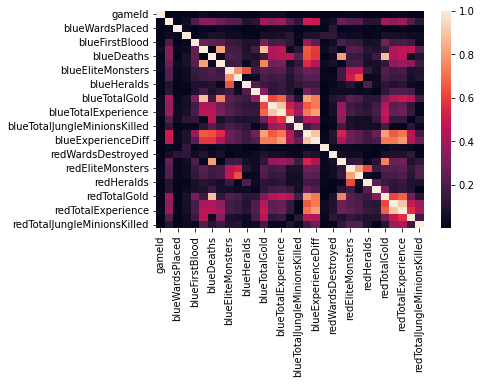

In [22]:
sns.heatmap(data.corr().abs())
plt.show()

In [23]:
print(data.columns)

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redWardsPlaced', 'redWardsDestroyed', 'redAssists', 'redEliteMonsters',
       'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold',
       'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled'],
      dtype='object')


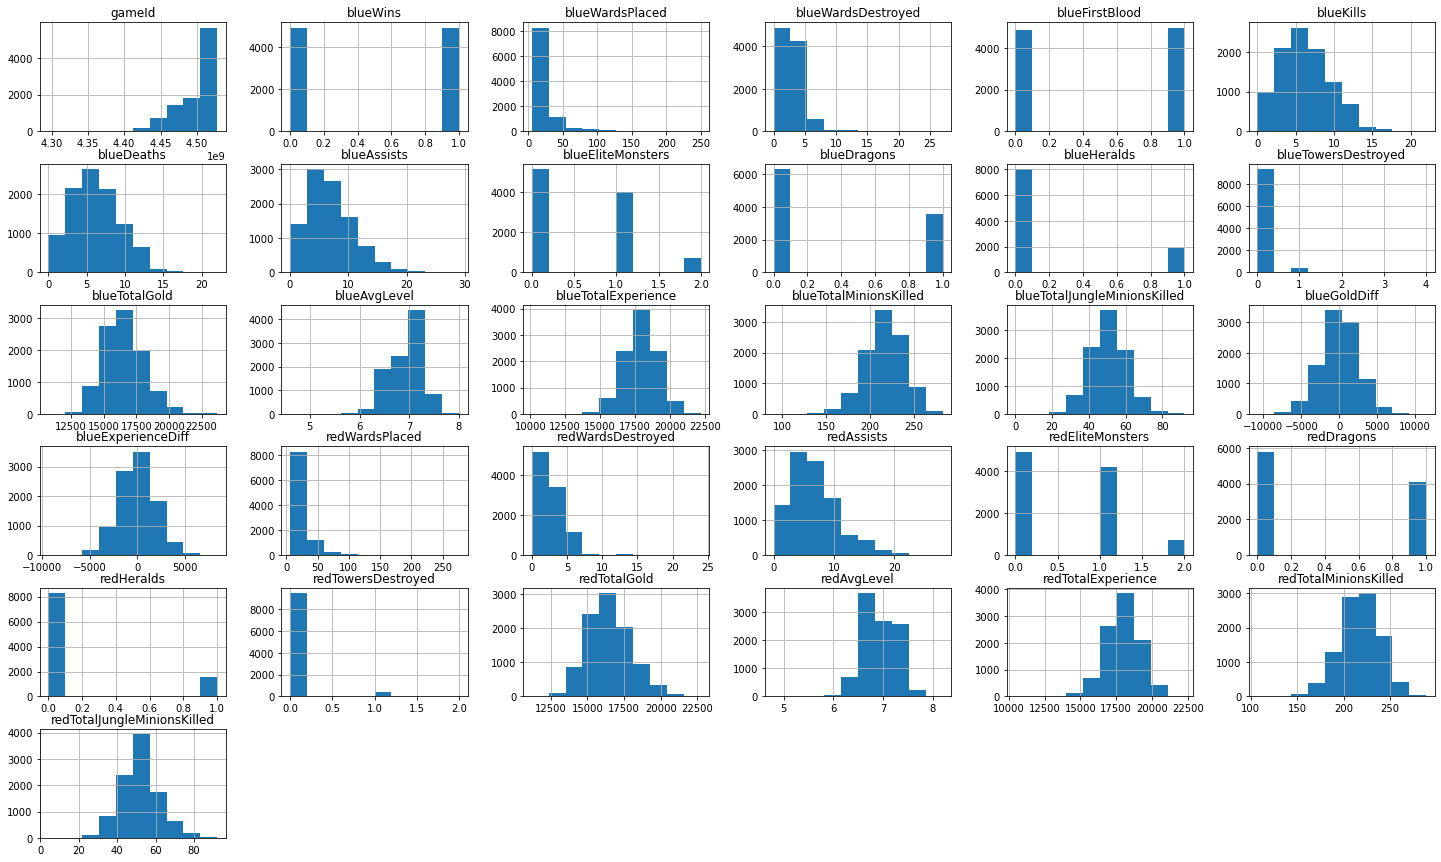

In [24]:
data.hist(figsize=(25,15))
plt.show()

In [25]:
print(data.blueWins.value_counts())

0    4949
1    4930
Name: blueWins, dtype: int64


In [26]:
blueVictories = data[data.blueWins == 1]
blueLosses = data[data.blueWins == 0]

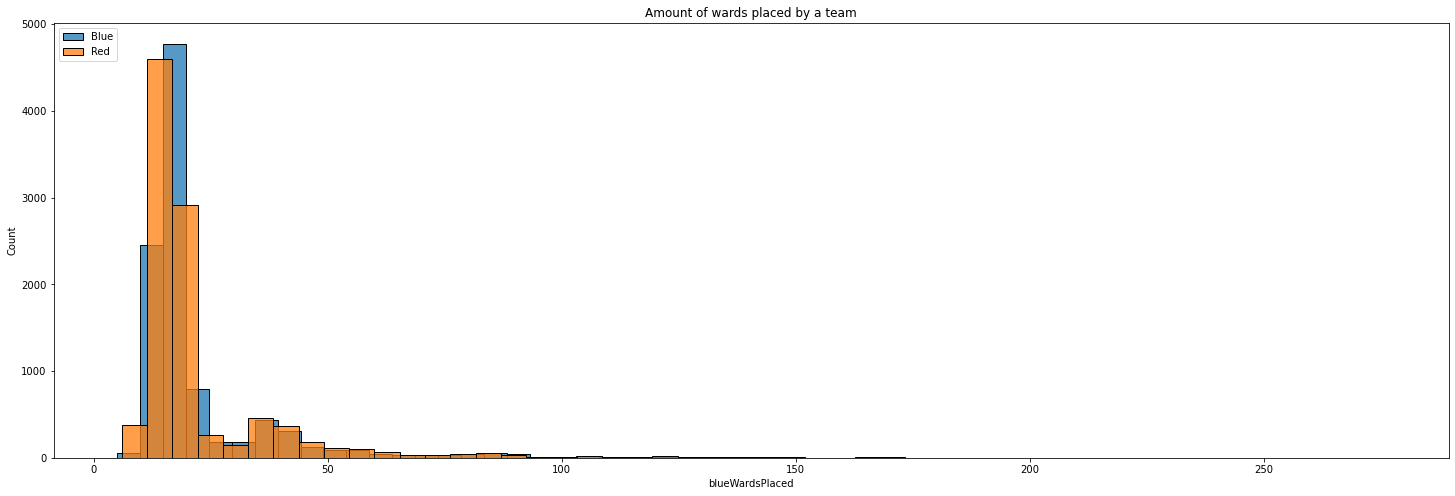

In [27]:
fig, ax = plt.subplots(figsize=(25,8))
sns.histplot(data['blueWardsPlaced'], bins=50, label='Blue')
sns.histplot(data['redWardsPlaced'], bins=50, label='Red')
plt.legend(loc="upper left")
plt.title("Amount of wards placed by a team")
plt.show()

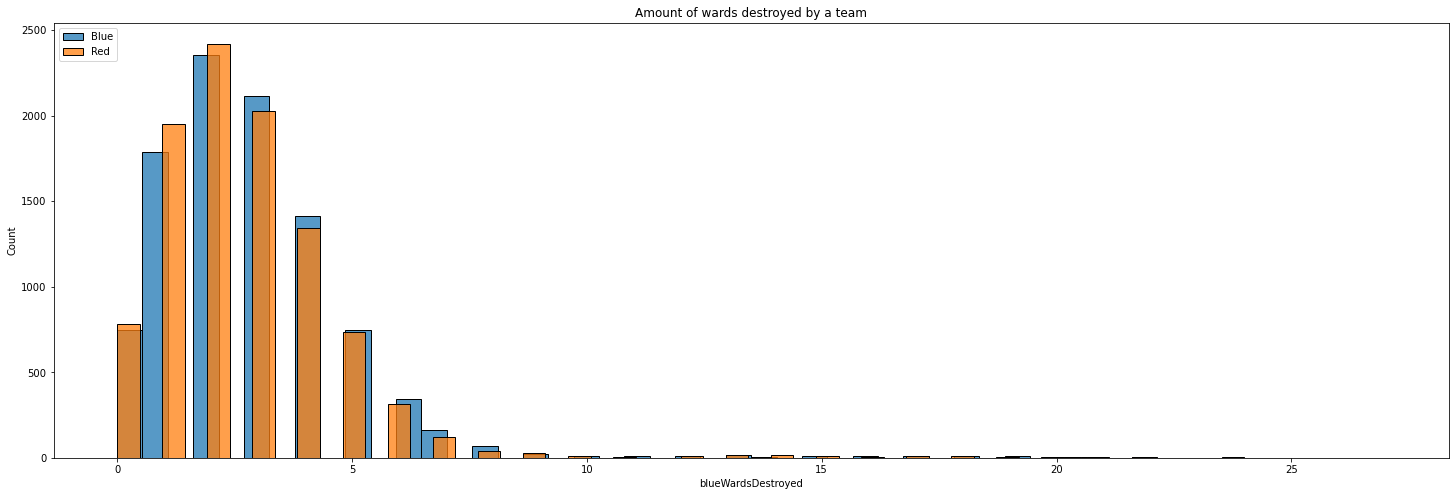

In [28]:
fig, ax = plt.subplots(figsize=(25,8))
sns.histplot(data['blueWardsDestroyed'], bins=50, label='Blue')
sns.histplot(data['redWardsDestroyed'], bins=50, label='Red')
plt.legend(loc="upper left")
plt.title("Amount of wards destroyed by a team")
plt.show()

In [29]:
print(f"Wins:\n{blueVictories['blueFirstBlood'].value_counts(normalize=True)}")
print(f"Wins:\n{blueLosses['blueFirstBlood'].value_counts(normalize=True).sort_values()}")

Wins:
1    0.605882
0    0.394118
Name: blueFirstBlood, dtype: float64
Wins:
1    0.404122
0    0.595878
Name: blueFirstBlood, dtype: float64


There are 2 main objectives before 10th minute in LoL. Dragon and Herald - each spawns only once before minute 10, each is on the other map side.

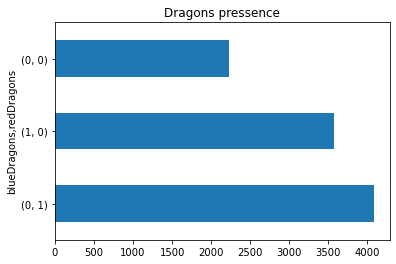

In [30]:
data[['blueDragons', 'redDragons']].value_counts().plot(kind='barh')
plt.title("Dragons pressence")
plt.show()

Red side takes the first dragon more often, because of the map design

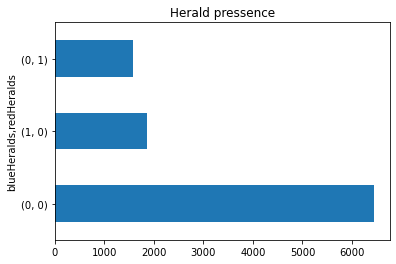

In [31]:
data[['blueHeralds', 'redHeralds']].value_counts().plot(kind='barh')
plt.title("Herald pressence")
plt.show()

In [32]:
print(f"In winning games, blue took dragon {round(100*blueVictories['blueDragons'].value_counts(normalize=True)[1], 2)}% of the time")
print(f"In losing, the dragon was taken only in {round(100*blueLosses['blueDragons'].value_counts(normalize=True)[1], 2)}% of the cases")

print(f"\nIf blue team ended up winning, herald was taken {round(100*blueVictories['blueHeralds'].value_counts(normalize=True)[1],2)}% of the time by them, while it was only {round(100*blueLosses['blueHeralds'].value_counts(normalize=True)[1], 2)}% if losing.")

In winning games, blue took dragon 46.49% of the time
In losing, the dragon was taken only in 25.94% of the cases

If blue team ended up winning, herald was taken 22.41% of the time by them, while it was only 15.19% if losing.


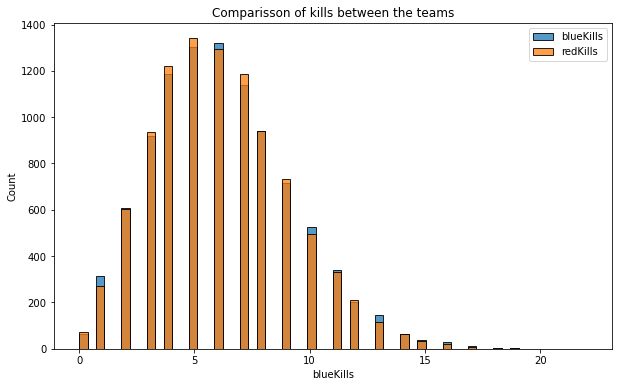

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data.blueKills, label='blueKills')
sns.histplot(data.blueDeaths, label='redKills')  # blue deaths == red kills
plt.legend(loc="upper right")
plt.title('Comparisson of kills between the teams')
plt.show()

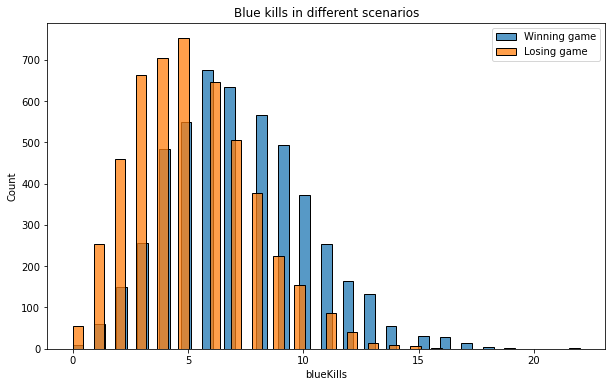

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(blueVictories.blueKills, label='Winning game')
sns.histplot(blueLosses.blueKills, label='Losing game')  
plt.legend(loc="upper right")
plt.title('Blue kills in different scenarios')
plt.show()

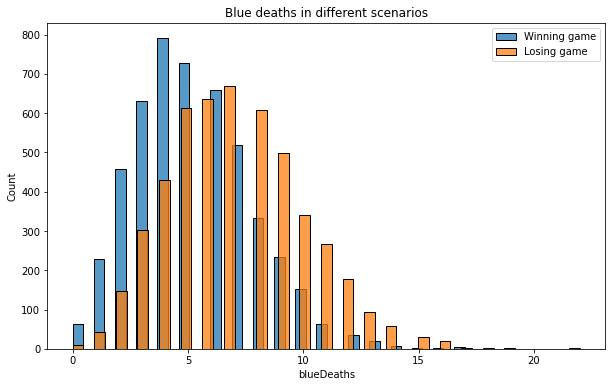

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(blueVictories.blueDeaths, label='Winning game')
sns.histplot(blueLosses.blueDeaths, label='Losing game')  
plt.legend(loc="upper right")
plt.title('Blue deaths in different scenarios')
plt.show()

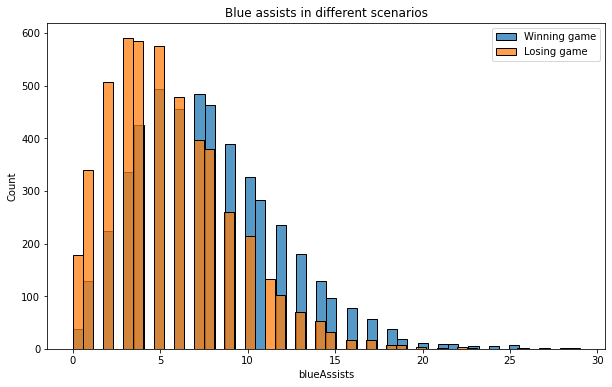

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(blueVictories.blueAssists, label='Winning game')
sns.histplot(blueLosses.blueAssists, label='Losing game')  
plt.legend(loc="upper right")
plt.title('Blue assists in different scenarios')
plt.show()

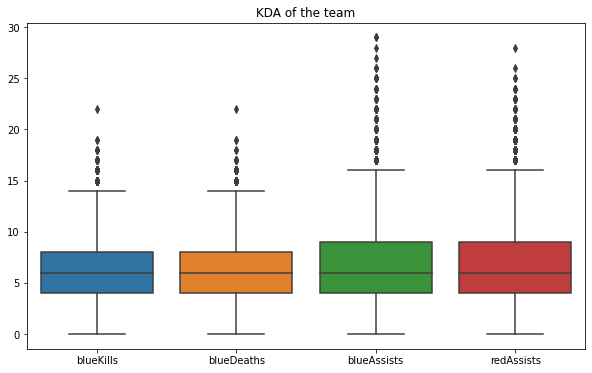

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=data[['blueKills', 'blueDeaths', 'blueAssists', 'redAssists']])
plt.title("KDA of the team")
plt.show()

In [38]:
print(data[['blueDragons', 'blueHeralds', 'blueEliteMonsters']].value_counts())

blueDragons  blueHeralds  blueEliteMonsters
0            0            0                    5156
1            0            1                    2866
0            1            1                    1147
1            1            2                     710
dtype: int64


EliteMonsters is just a sum of Dragons and Heralds killed, we would prefer to keep this data separated.

In [39]:
data.drop(columns={'blueEliteMonsters', 'redEliteMonsters'}, inplace=True)

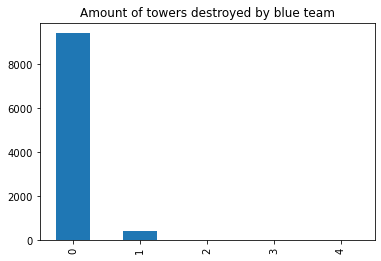

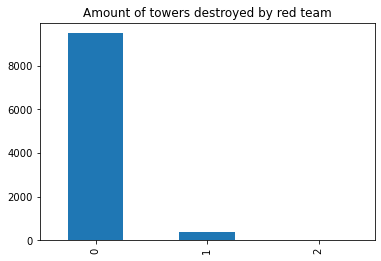

In [40]:
data.blueTowersDestroyed.value_counts().plot(kind='bar')
plt.title('Amount of towers destroyed by blue team')
plt.show()

data.redTowersDestroyed.value_counts().plot(kind='bar')
plt.title('Amount of towers destroyed by red team')
plt.show()

In [41]:
print(blueVictories.blueTowersDestroyed.value_counts())
print(blueLosses.blueTowersDestroyed.value_counts())

0    4580
1     316
2      26
3       7
4       1
Name: blueTowersDestroyed, dtype: int64
0    4835
1     113
2       1
Name: blueTowersDestroyed, dtype: int64


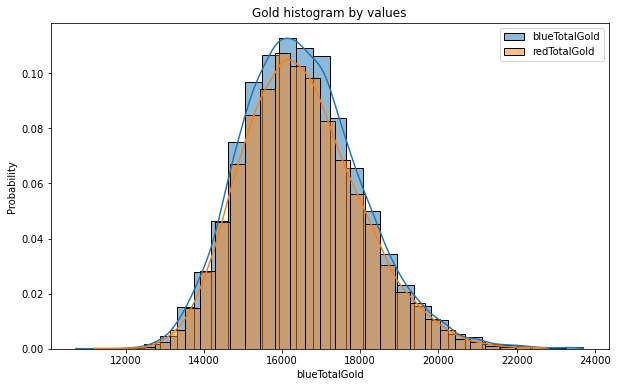

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data['blueTotalGold'], bins=30, label='blueTotalGold', kde=True, stat='probability')
sns.histplot(data['redTotalGold'], bins=30, label='redTotalGold', kde=True, stat='probability')
plt.legend(loc="upper right")
plt.title('Gold histogram by values')
plt.show()

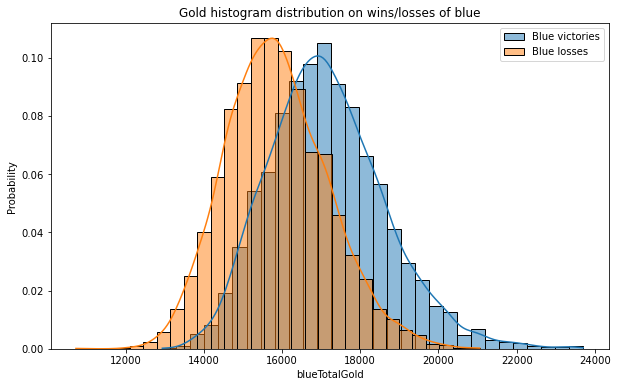

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(blueVictories['blueTotalGold'], bins=30, label='Blue victories', kde=True, stat='probability')
sns.histplot(blueLosses['blueTotalGold'], bins=30, label='Blue losses', kde=True, stat='probability')
plt.legend(loc="upper right")
plt.title('Gold histogram distribution on wins/losses of blue')
plt.show()

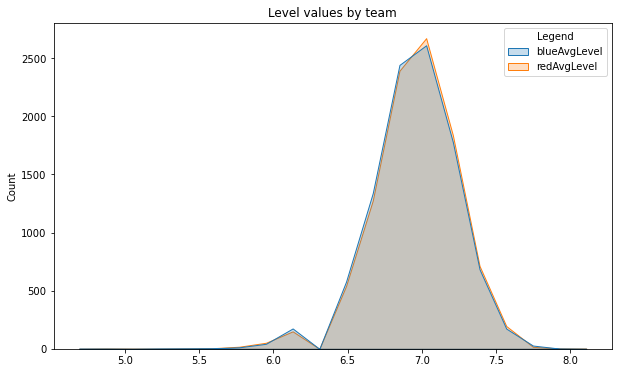

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data[['blueAvgLevel', 'redAvgLevel']], bins=20, hue_order=['blueAvgLevel', 'redAvgLevel'],element='poly', ax=ax)
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['blueAvgLevel', 'redAvgLevel'], title='Legend')
plt.title('Level values by team')
plt.show()

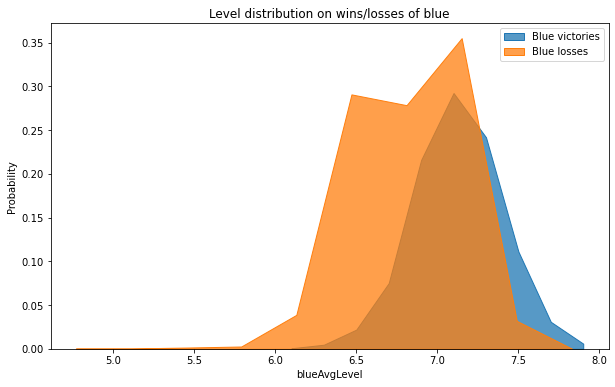

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(blueVictories['blueAvgLevel'], bins=10, label='Blue victories', element='poly',stat='probability')
sns.histplot(blueLosses['blueAvgLevel'], bins=10, label='Blue losses', element='poly', stat='probability')
plt.legend(loc="upper right")
plt.title('Level distribution on wins/losses of blue')
plt.show()

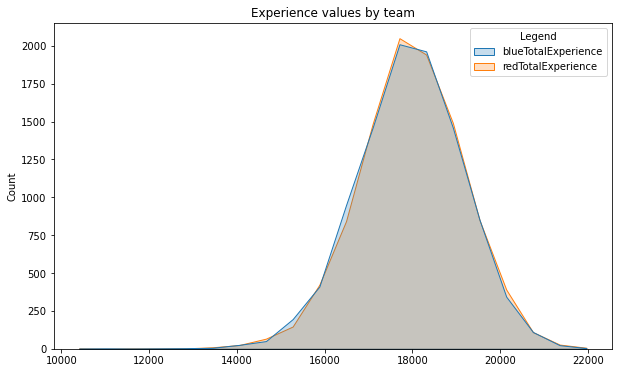

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data[['blueTotalExperience', 'redTotalExperience']], bins=20, hue_order=['blueTotalExperience', 'redTotalExperience'],element='poly', ax=ax)
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
ax.legend(handles, ['blueTotalExperience', 'redTotalExperience'], title='Legend')
plt.title('Experience values by team')
plt.show()

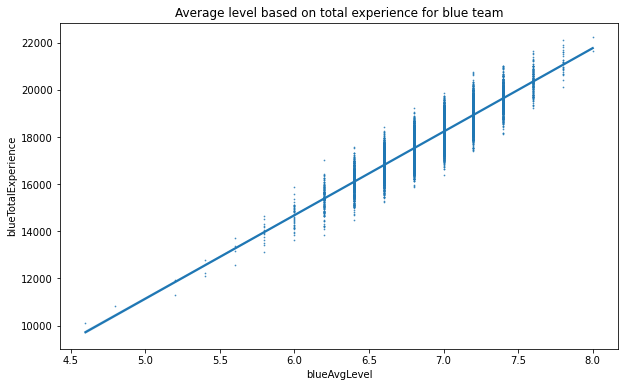

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x=data['blueAvgLevel'], y=data['blueTotalExperience'], scatter_kws={'s':0.5})
plt.title('Average level based on total experience for blue team')
plt.show()

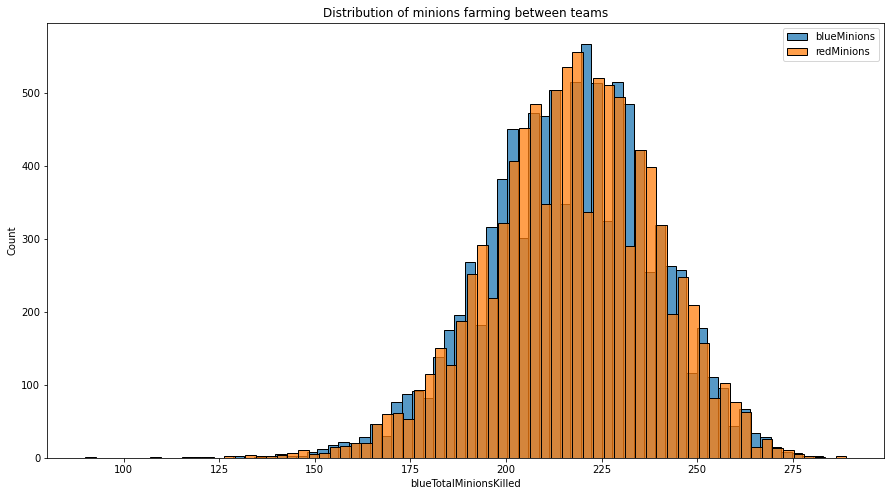

In [48]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(data['blueTotalMinionsKilled'], label='blueMinions')
sns.histplot(data['redTotalMinionsKilled'], label='redMinions')
plt.title('Distribution of minions farming between teams')
plt.legend(loc="upper right")
plt.show()

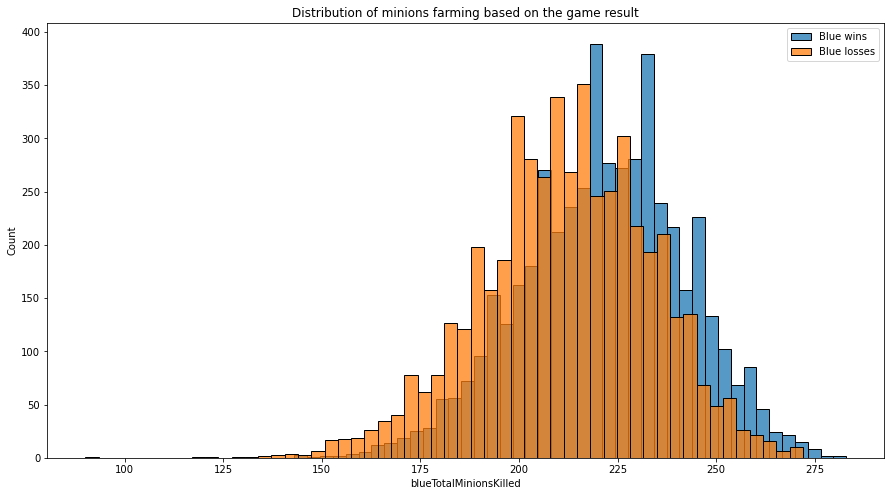

In [49]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(blueVictories['blueTotalMinionsKilled'], label='Blue wins')
sns.histplot(blueLosses['blueTotalMinionsKilled'], label='Blue losses')
plt.title('Distribution of minions farming based on the game result')
plt.legend(loc="upper right")
plt.show()

It is kinda difficult to assign jungle monsters farming to winning a game, since jungler can also help their lanes and get gold that way.

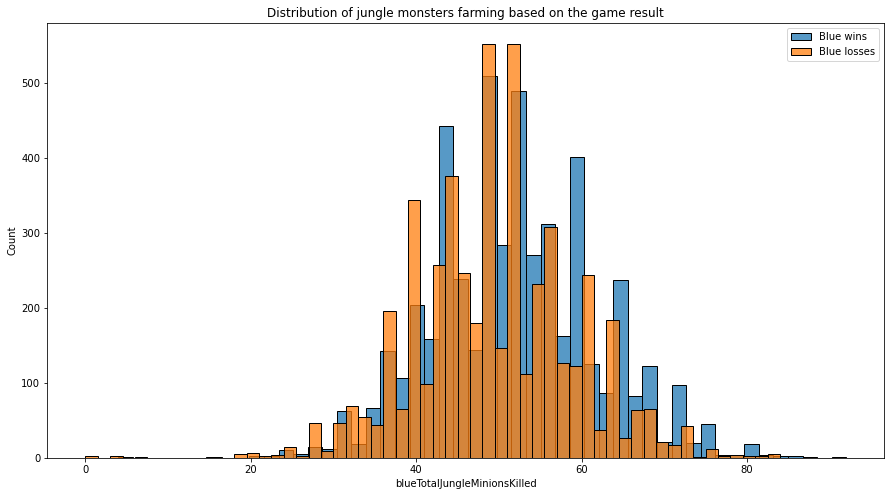

In [50]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(blueVictories['blueTotalJungleMinionsKilled'], label='Blue wins')
sns.histplot(blueLosses['blueTotalJungleMinionsKilled'], label='Blue losses')
plt.title('Distribution of jungle monsters farming based on the game result')
plt.legend(loc="upper right")
plt.show()

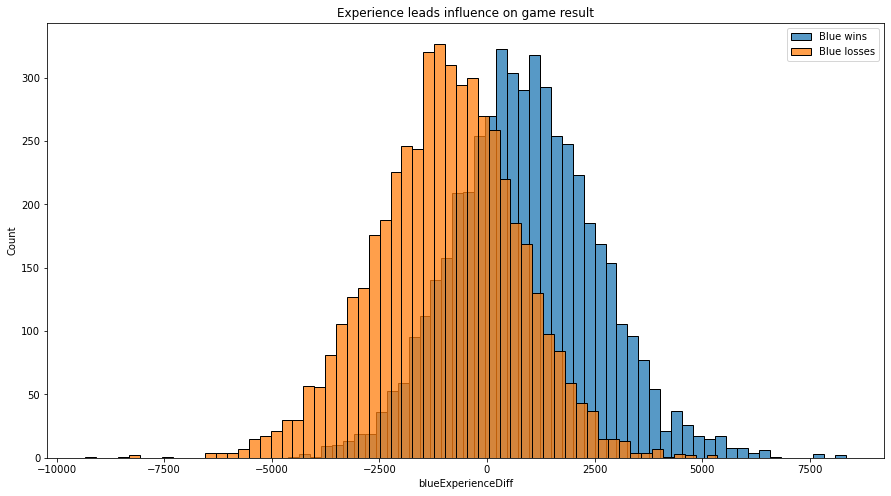

In [51]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(blueVictories['blueExperienceDiff'], label='Blue wins')
sns.histplot(blueLosses['blueExperienceDiff'], label='Blue losses')
plt.title('Experience leads influence on game result')
plt.legend(loc="upper right")
plt.show()

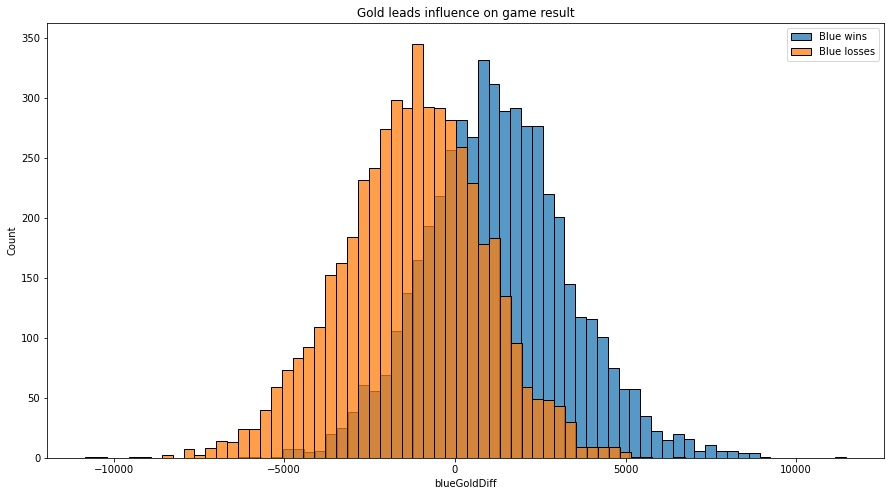

In [52]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(blueVictories['blueGoldDiff'], label='Blue wins')
sns.histplot(blueLosses['blueGoldDiff'], label='Blue losses')
plt.title('Gold leads influence on game result')
plt.legend(loc="upper right")
plt.show()

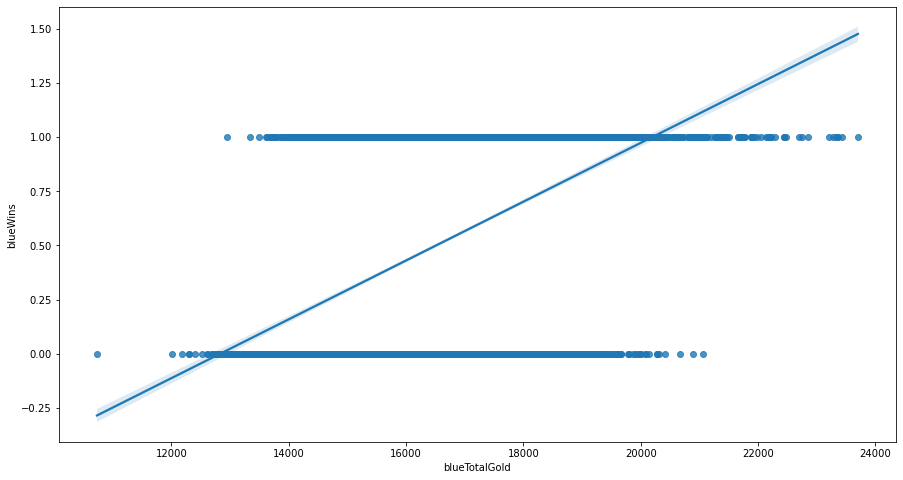

In [53]:
fig, ax = plt.subplots(figsize=(15,8))
sns.regplot(x=data['blueTotalGold'], y=data['blueWins'])
plt.show()